## Importing the necessary Libraries

In [193]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Loading dataset

In [194]:
df= pd.read_csv('/Users/sambhavgupta/Documents/Git/Dream_Housing_Finance_Loan_Classification/loan_data.csv')

In [195]:
# Making a copy of the dataset
df1= df.copy()  

In [196]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [197]:
df1.shape

(614, 13)

In [198]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [199]:
# Here we are checking the number of NULL values present in each column/feature
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [200]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


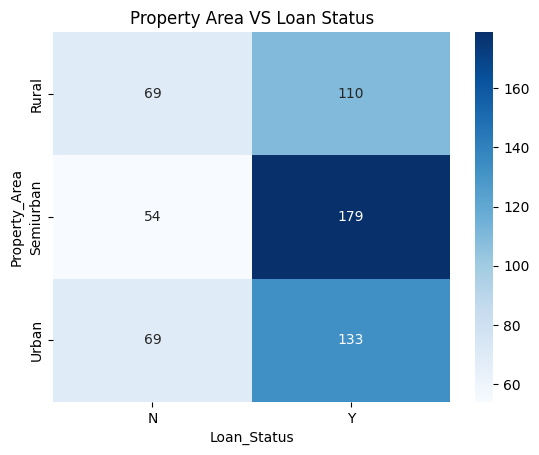

In [201]:
ct_area= pd.crosstab(df1['Property_Area'], df1['Loan_Status'])
sns.heatmap(ct_area, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Property Area VS Loan Status")
plt.show()

1. Semiurban areas have the highest number and propertion of approved loans(179 approvals vs 54 rejections), indicating better loan approval chances for applicants from these areas.
2. Urban areas have a moderate approval rate, wth more approval than rejection but not as favorable as semiurban.
3. Rural areas have the lowest approval rate, suggesting loan applicats from rural areas face realtively higher chances of rejection.

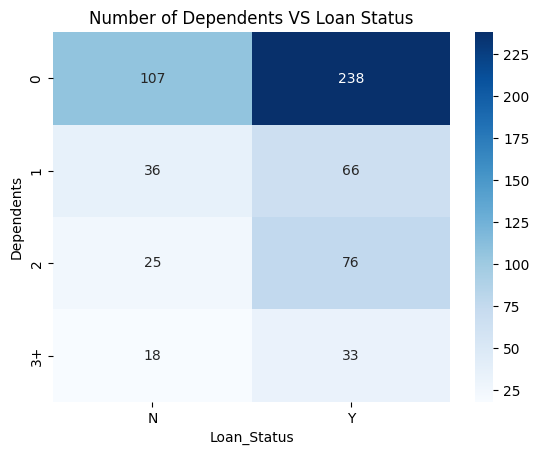

In [202]:
ct_dependents= pd.crosstab(df1['Dependents'], df1['Loan_Status'])
sns.heatmap(ct_dependents, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Number of Dependents VS Loan Status")
plt.show()

We can see from above that people with no Dependents are more likely to get approved for loan.

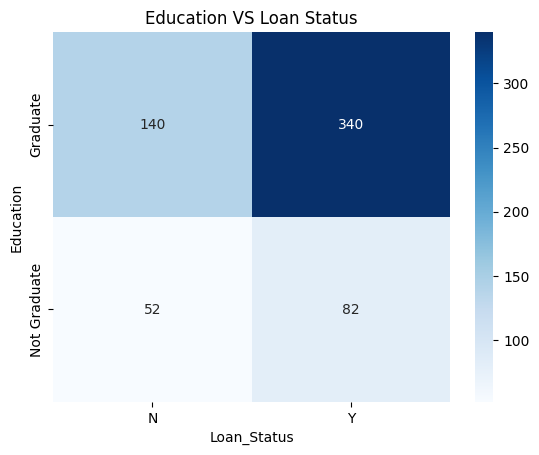

In [203]:
ct_education= pd.crosstab(df1['Education'], df1['Loan_Status'])
sns.heatmap(ct_education, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Education VS Loan Status")
plt.show()

Graduate applicants are more likely to get approved for loans.

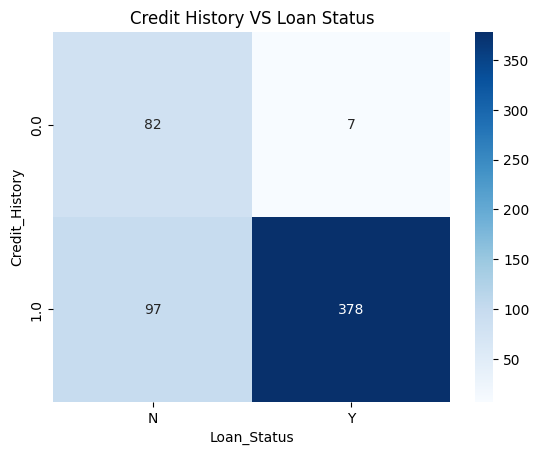

In [204]:
ct_credit_history= pd.crosstab(df1['Credit_History'], df1['Loan_Status'])
sns.heatmap(ct_credit_history, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Credit History VS Loan Status")
plt.show()

Applicants with credit history have higher chances to get loan approved.


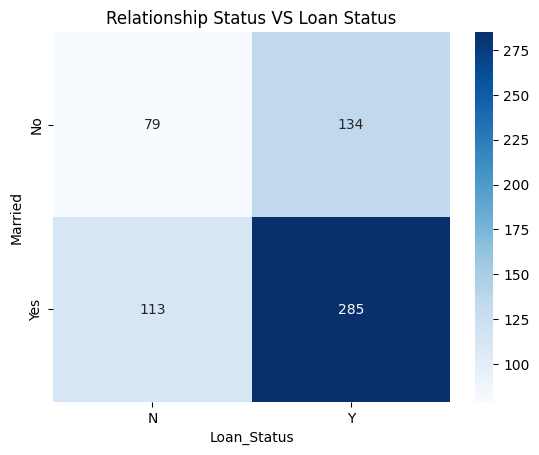

In [205]:
ct_married= pd.crosstab(df1['Married'], df1['Loan_Status'])
sns.heatmap(ct_married, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Relationship Status VS Loan Status")
plt.show()

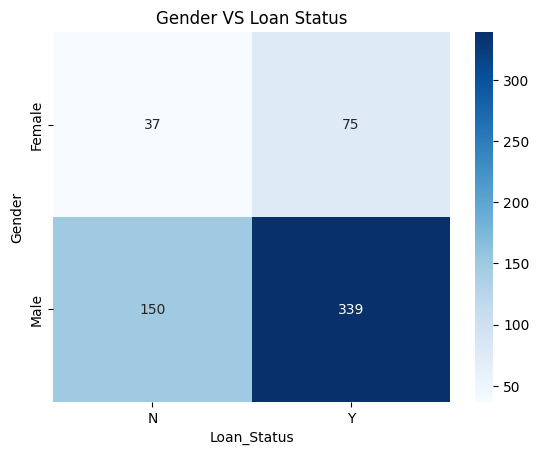

In [206]:
ct_gender= pd.crosstab(df1['Gender'], df1['Loan_Status'])
sns.heatmap(ct_gender, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Gender VS Loan Status")
plt.show()

The approval ratio is consistent for both genders, indicating that gender may not be a strong predictor of loan approval in this dataset.

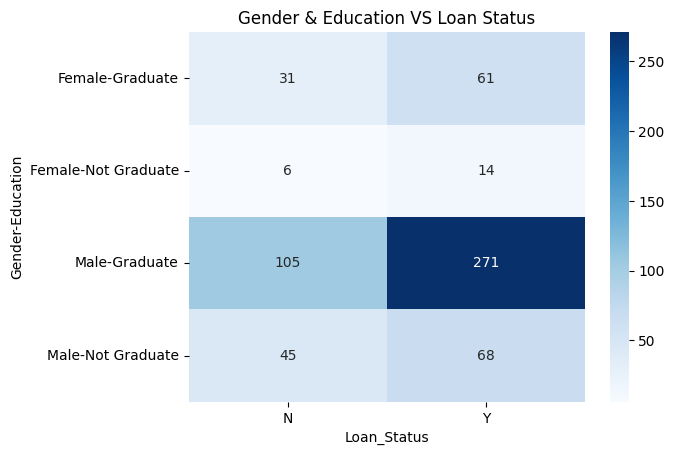

In [207]:
ct_education_gender= pd.crosstab([df1['Gender'], df1['Education']], df1['Loan_Status'])
sns.heatmap(ct_education_gender, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Gender & Education VS Loan Status")
plt.show()

Across both genders graduates have better approval rate.

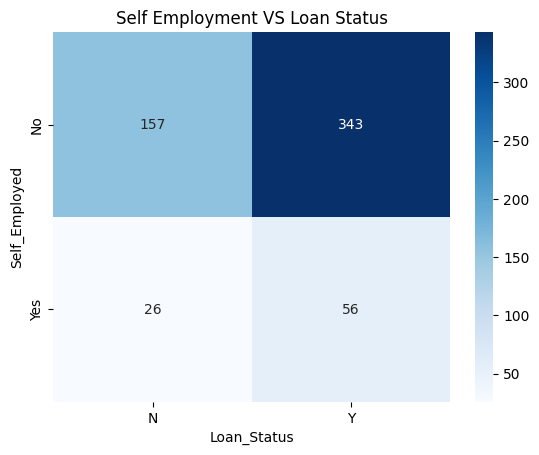

In [208]:
ct_employed= pd.crosstab(df1['Self_Employed'], df1['Loan_Status'])
sns.heatmap(ct_employed, annot= True, cmap= 'Blues', fmt= 'd')
plt.title("Self Employment VS Loan Status")
plt.show()

Loan approval decisions are not strongly affected by self-employment status.

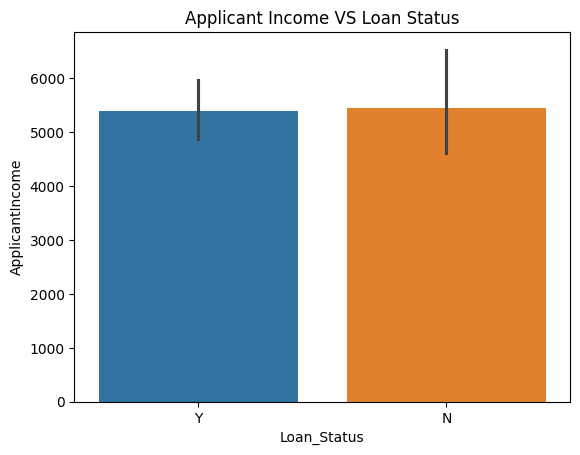

In [209]:
sns.barplot(data= df1, x= df1['Loan_Status'], y= df1['ApplicantIncome'], hue= df1['Loan_Status'])
plt.title("Applicant Income VS Loan Status")
plt.show()


Applicant income alone does not seem to be a strong discriminator for loan approval.

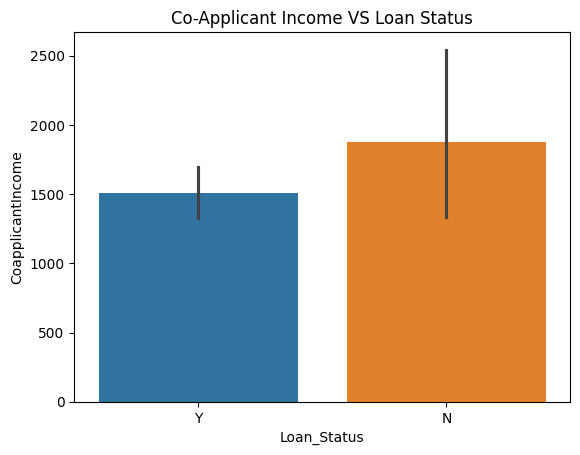

In [210]:
sns.barplot(data= df1, x= df1['Loan_Status'], y= df1['CoapplicantIncome'], hue= df1['Loan_Status'])
plt.title("Co-Applicant Income VS Loan Status")
plt.show()


Loans with lower and more stable co-applicant incomes tend to be approved more frequently.

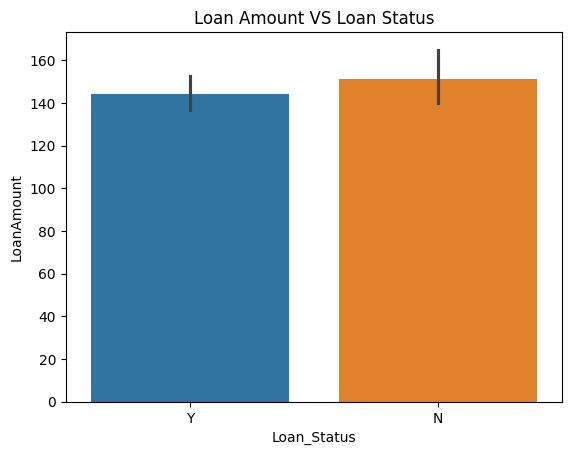

In [211]:
sns.barplot(data= df1, x= df1['Loan_Status'], y= df1['LoanAmount'], hue= df1['Loan_Status'])
plt.title("Loan Amount VS Loan Status")
plt.show()


On average, rejected applicants ask for slightly higher loan amounts, but the difference is not large or strongly significant.

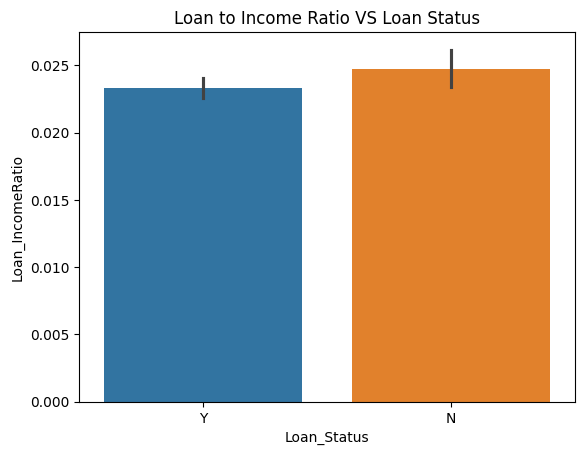

In [212]:
df1['Total_Income']= df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1['Loan_IncomeRatio']= df1['LoanAmount'] / df1['Total_Income']
sns.barplot(data= df1, x= df1['Loan_Status'], y= df1['Loan_IncomeRatio'], hue= df1['Loan_Status'])
plt.title("Loan to Income Ratio VS Loan Status")
plt.show()

Loan-to-Income Ratio alone does not explain approval decisions fully.

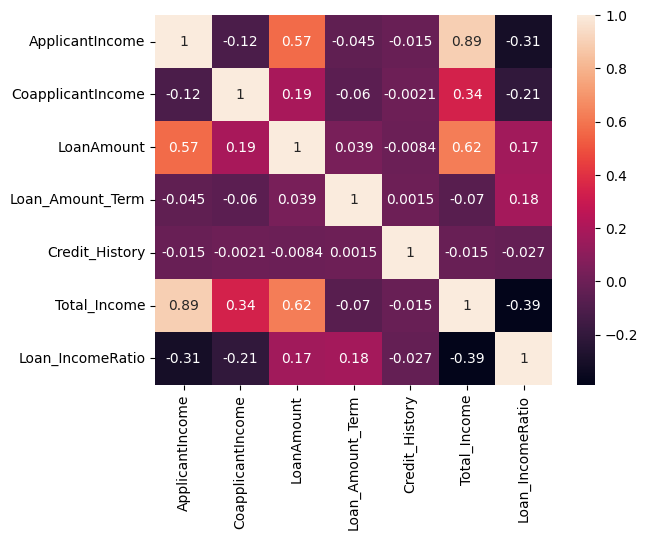

In [213]:
df1_num= df1.select_dtypes(include= ['number'])
sns.heatmap(df1_num.corr(), annot= True)
plt.show()


This heatmap shows the co-relation between different numerical features.

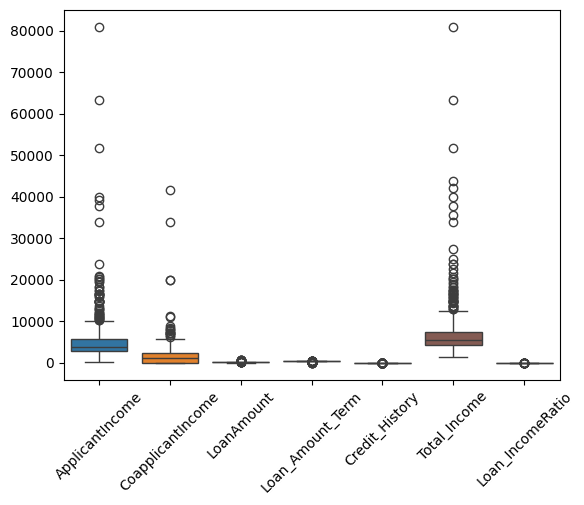

In [214]:
sns.boxplot(data= df1_num)
plt.xticks(rotation= 45)
plt.show()

We can see that the dataset has outliers.

# Pre-processing 

In [215]:
#We will remove Loan_ID column because it is irrelevent for predictive analysis.
df= df.drop('Loan_ID', axis= 1)

In [216]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [217]:
(df.isnull().sum() / len(df)) * 100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Our dataset contains missing values we will be imputing these values.

In [218]:
# Here we have imputed categorical features with their mode.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]= df[col].fillna(df[col].mode()[0])

In [219]:
# Since our dataset contains outliers we will be impputing the numerical columns with median by group.
print(df['ApplicantIncome'].median())
print(df.groupby('Education')['ApplicantIncome'].median())
print(df.groupby('Self_Employed')['ApplicantIncome'].median())
print(df.groupby(['Education', 'Self_Employed'])['ApplicantIncome'].median())

3812.5
Education
Graduate        4000.0
Not Graduate    3357.5
Name: ApplicantIncome, dtype: float64
Self_Employed
No     3698.0
Yes    5809.0
Name: ApplicantIncome, dtype: float64
Education     Self_Employed
Graduate      No               3846.0
              Yes              6250.0
Not Graduate  No               3200.0
              Yes              4695.0
Name: ApplicantIncome, dtype: float64


Here we can see that others features affect the median, so we will be imputing the missing values w.r.t. Education and Employment 

In [220]:
df['ApplicantIncome']= df.groupby(by= ['Education', 'Self_Employed'])['ApplicantIncome'].transform(lambda x: x.fillna(x.median()))
df['ApplicantIncome'].isnull().any()

False

In [221]:
df['CoapplicantIncome']= df.groupby(by= ['Education', 'Self_Employed'])['CoapplicantIncome'].transform(lambda x: x.fillna(x.median()))
df['CoapplicantIncome'].isnull().any()

False

In [222]:
print(df['LoanAmount'].isnull().sum())
print(df['Loan_Amount_Term'].isnull().sum())

22
14


In [223]:
#Since LoanAmount has no outliers we will impute missing values with mean
print(df['LoanAmount'].mean())
print(df.groupby('Education')['LoanAmount'].mean())
print(df.groupby('Self_Employed')['LoanAmount'].mean())
print(df.groupby(['Self_Employed', 'Education'])['LoanAmount'].mean())


146.41216216216216
Education
Graduate        154.060215
Not Graduate    118.409449
Name: LoanAmount, dtype: float64
Self_Employed
No     142.471735
Yes    172.000000
Name: LoanAmount, dtype: float64
Self_Employed  Education   
No             Graduate        149.724566
               Not Graduate    115.900000
Yes            Graduate        182.241935
               Not Graduate    134.647059
Name: LoanAmount, dtype: float64


In [224]:
df['LoanAmount']= df.groupby(['Education', 'Self_Employed'])['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

In [225]:
#Since LoanAmount has no outliers we will impute missing values with mean
print(df['Loan_Amount_Term'].mean())
print(df.groupby('Education')['Loan_Amount_Term'].mean())
print(df.groupby('Self_Employed')['Loan_Amount_Term'].mean())
print(df.groupby(['Self_Employed', 'Education'])['Loan_Amount_Term'].mean())


342.0
Education
Graduate        344.669492
Not Graduate    332.156250
Name: Loan_Amount_Term, dtype: float64
Self_Employed
No     342.876923
Yes    336.300000
Name: Loan_Amount_Term, dtype: float64
Self_Employed  Education   
No             Graduate        345.735294
               Not Graduate    332.464286
Yes            Graduate        337.875000
               Not Graduate    330.000000
Name: Loan_Amount_Term, dtype: float64


In [226]:
df['Loan_Amount_Term']= df.groupby(['Education', 'Self_Employed'])['Loan_Amount_Term'].transform(lambda x: x.fillna(x.mean()))

In [227]:
df[df['Credit_History'].isnull()].groupby(['Education', 'Self_Employed', 'Property_Area']).size()

Education     Self_Employed  Property_Area
Graduate      No             Rural             9
                             Semiurban         9
                             Urban            14
              Yes            Rural             1
                             Semiurban         1
                             Urban             3
Not Graduate  No             Rural             4
                             Semiurban         4
                             Urban             3
              Yes            Semiurban         2
dtype: int64

The missing values are concentrated in specific groups, particularly:
1. Graduates who are not self-employed across all property areas.
2. A noticeable cluster in Urban areas for that same group.
3. Even Not Graduates who are self-employed have missing values, but less.

In [228]:
# Function to fill with mode
def fill_mode(series):
    mode_vals = series.mode()
    if not mode_vals.empty:
        return series.fillna(mode_vals[0])
    else:
        return series  

# Apply group-wise mode imputation
df['Credit_History'] = df.groupby(['Education', 'Self_Employed', 'Property_Area'])['Credit_History'].transform(fill_mode)

In [229]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All missing values are imputed.

In [230]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,149.724566,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


We will now be performing binay-encoding on binary features.

In [231]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [232]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,149.724566,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [233]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [234]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)
dummy_cols = [col for col in df.columns if col.startswith('Property_Area_')]
df[dummy_cols] = df[dummy_cols].astype(int)

Removing Outliers 

In [235]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR outlier removal
df_cleaned = remove_outliers_iqr(df, 'ApplicantIncome')
df_cleaned = remove_outliers_iqr(df_cleaned, 'CoapplicantIncome')

In [236]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,1,0,5849,0.0,149.724566,360.0,1.0,1,0,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1


Now we will scale the numerical features.

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
scaler= StandardScaler()
cols_to_scale= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaled_array= scaler.fit_transform(df_cleaned[cols_to_scale])
df_scaled= pd.DataFrame(scaled_array, columns= cols_to_scale, index= df_cleaned.index)
df_scaled= pd.concat([df_cleaned.drop(cols_to_scale, axis= 1), df_scaled], axis= 1)

In [239]:
df_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0.0,1,0,1.0,1,0,1,0.902588,-0.933096,0.361063,0.270766
1,1,1,1.0,1,0,1.0,0,0,0,0.238250,0.101980,-0.058760,0.270766
2,1,1,0.0,1,1,1.0,1,0,1,-0.592435,-0.933096,-1.256896,0.270766
3,1,1,0.0,0,0,1.0,1,0,1,-0.811258,0.685412,-0.213358,0.270766
4,1,0,0.0,1,0,1.0,1,0,1,0.981826,-0.933096,0.192462,0.270766


In [240]:
df_scaled['Loan_Status'].value_counts()

Loan_Status
1    380
0    168
Name: count, dtype: int64

The data is highly imbalanced this will make the model bias. 
we will balance the data by Up-sampling.

In [241]:
from sklearn.utils import resample

In [242]:
df_majority= df_scaled[df_scaled['Loan_Status']== 1]
df_minority= df_scaled[df_scaled['Loan_Status']== 0]

In [243]:
df_minority_upsampled= resample(df_minority, replace= True, n_samples= len(df_majority), random_state= 42)

In [244]:
df_upsampled= pd.concat([df_majority, df_minority_upsampled])

In [245]:
df_upsampled.shape

(760, 13)

# Predictive Modelling 

In [246]:
X= df_upsampled.drop('Loan_Status', axis= 1)
y= df_upsampled['Loan_Status']

In [247]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 42, test_size= 0.2)

We will tune the Hyperparameters to get the best accuracy for the model.

In [248]:
from sklearn.model_selection import GridSearchCV

In [249]:
lg_clsfr= LogisticRegression()

In [250]:
params= {'penalty': ['l1', 'l2', 'elasticnet', 'None'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'max_iter': [100, 200, 500, 1000]}
grid= GridSearchCV(lg_clsfr, params)
grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2560 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [251]:
grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Now we have the best parameters for Logistic Regression.

In [252]:
lg_clsfr= LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l1', solver= 'liblinear', random_state= 42)
lg_clsfr.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [253]:
y_test_pred= lg_clsfr.predict(X_test)

In [254]:
from sklearn import metrics

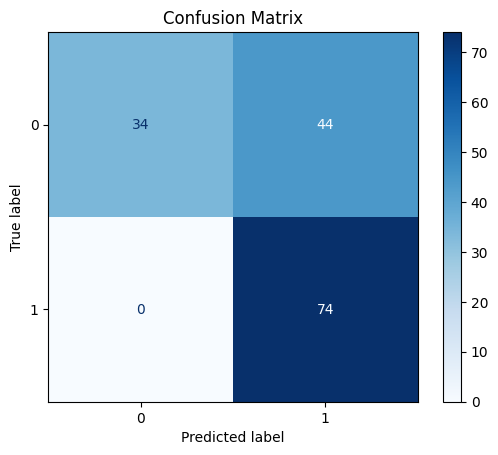

In [255]:
cm= metrics.confusion_matrix(y_test, y_test_pred)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap= 'Blues')
plt.title('Confusion Matrix')
plt.show()

1. Model correctly predicted 74 loan approvals.
2. Model correctly predicted 34 rejections.
3. Model wrongly approved 44 rejected applicants.
4. Model missed no approved applicants.

In [256]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        78
           1       0.63      1.00      0.77        74

    accuracy                           0.71       152
   macro avg       0.81      0.72      0.69       152
weighted avg       0.82      0.71      0.69       152



In [257]:
log_roc_auc= metrics.roc_auc_score(y_test, y_test_pred)
log_roc_auc

0.717948717948718

Now we will use Decision Tree Classifier.

In [258]:
# we will use df_cleaned because decision tree does not require scaled features.
df_cleaned['Loan_Status'].value_counts()

Loan_Status
1    380
0    168
Name: count, dtype: int64

In [259]:
# we have to up-sample df_cleaned as well.
df_majority= df_cleaned[df_cleaned['Loan_Status']== 1]
df_minority= df_cleaned[df_cleaned['Loan_Status']== 0]
df_minority_upsampled= resample(df_minority, replace= True, n_samples= len(df_majority), random_state= 42)
df_cleaned_upsampled= pd.concat([df_majority, df_minority_upsampled])
df_cleaned_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,1,0,5849,0.0,149.724566,360.0,1.0,1,0,1
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1
5,1,1,2.0,1,1,5417,4196.0,267.000000,360.0,1.0,1,0,1


In [260]:
X= df_cleaned_upsampled.drop('Loan_Status', axis= 1)
y= df_cleaned_upsampled['Loan_Status']
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 42, test_size= 0.2)

In [261]:
params= {'max_depth': [3, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy'], 'ccp_alpha': [0.0, 0.01, 0.02]}

In [262]:
grid= GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.02],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [263]:
grid.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [264]:
dt_clsfr= DecisionTreeClassifier(ccp_alpha= 0.0, criterion= 'entropy', max_depth= 15, min_samples_leaf= 1, min_samples_split= 2, random_state= 42)
dt_clsfr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

In [265]:
y_test_pred= dt_clsfr.predict(X_test)

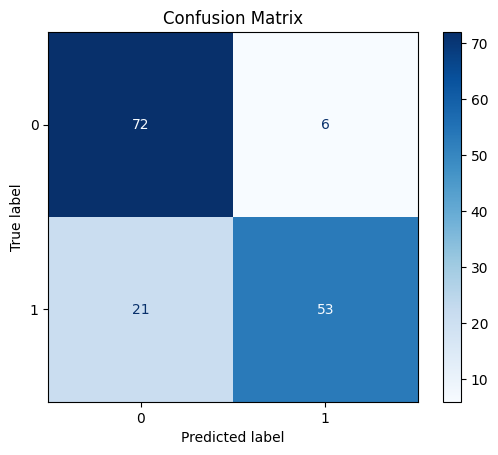

In [266]:
cm= metrics.confusion_matrix(y_test, y_test_pred)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap= 'Blues')
plt.title('Confusion Matrix')
plt.show()

1. Model correctly predicted 53 loan approvals.
2. Model correctly predicted 72 rejections.
3. Model wrongly approved 6 rejected applicants.
4. Model wrongly rejected 21 approved applicants.

In [267]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        78
           1       0.90      0.72      0.80        74

    accuracy                           0.82       152
   macro avg       0.84      0.82      0.82       152
weighted avg       0.83      0.82      0.82       152



In [268]:
dt_roc_auc= metrics.roc_auc_score(y_test, y_test_pred)
dt_roc_auc

0.8196465696465698

Finally we will use KNN Classifier.

In [269]:
X= df_upsampled.drop('Loan_Status', axis= 1)
y= df_upsampled['Loan_Status']
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 42, test_size= 0.2)

In [270]:
params= {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'p': [1, 2]}
grid= GridSearchCV(KNeighborsClassifier(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [271]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 29, 'p': 1, 'weights': 'distance'}

In [272]:
knn_clsfr= KNeighborsClassifier(metric= 'manhattan', n_neighbors= 29, p= 1, weights= 'distance')
knn_clsfr.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=29, p=1,
                     weights='distance')

In [273]:
y_test_pred= knn_clsfr.predict(X_test)

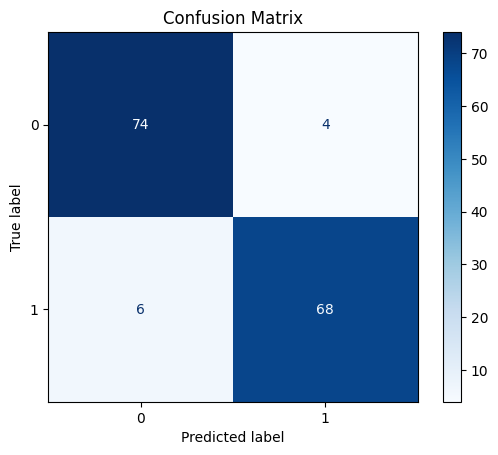

In [274]:
cm= metrics.confusion_matrix(y_test, y_test_pred)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap= 'Blues')
plt.title('Confusion Matrix')
plt.show()

1. Model correctly predicted 68 loan approvals.
2. Model correctly predicted 74 rejections.
3. Model wrongly approved 4 rejected applicants.
4. Model wrongly rejected 6 approved applicants.

In [275]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        78
           1       0.94      0.92      0.93        74

    accuracy                           0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152



In [277]:
knn_roc_auc= metrics.roc_auc_score(y_test, y_test_pred)
knn_roc_auc

0.9338184338184338

In [280]:
print("ROC AUC Score")
print('Logistic Regression:', round(log_roc_auc,2))
print('Decision Tree:', round(dt_roc_auc,2))
print('KNN:', round(knn_roc_auc,2))

ROC AUC Score
Logistic Regression: 0.72
Decision Tree: 0.82
KNN: 0.93


Insights:
	

1. Logistic Regression  
    High recall (doesn’t miss any approvals) <br>
    Very low precision (approves too many wrong applicants)


2. Decision Tree<br>
    Safer than logistic regression (only 4 FPs)<br>
    Misses many actual approved cases (17 FNs)

3. KNN<br>
    Best balance between precision and recall<br>
    Very few mistakes overall
